In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [14]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters

record_count = 1
set_count =1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | bata
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | namatanai
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | kahna nau
Processing Record 10 of Set 1 | the valley
Processing Record 11 of Set 1 | bonavista
Processing Record 12 of Set 1 | qianguo
Processing Record 13 of Set 1 | weihe
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | gejiu
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | estelle
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | macapa
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | providen

Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | morondava
Processing Record 40 of Set 4 | palana
Processing Record 41 of Set 4 | aljezur
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | akyab
Processing Record 44 of Set 4 | mlonggo
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | meulaboh
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | athabasca
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | zapadnaya dvina
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | santa maria
Processing Record 6 of Set 5 | sabzevar
Processing Record 7 of Set 5 | houston
Processing Record 8 of Set 5 | jan kempdorp
Processing Record 9 of Set 5 | kibala
Processing Record 10 of Set 5

Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | maningrida
Processing Record 29 of Set 8 | bermejo
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | kloulklubed
Processing Record 33 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | gulu
Processing Record 36 of Set 8 | buqayq
City not found. Skipping...
Processing Record 37 of Set 8 | bulandshahr
Processing Record 38 of Set 8 | les cayes
Processing Record 39 of Set 8 | hervey bay
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | oistins
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | mitchell
Processing Record 44 of Set 8 | winnemucca
Processing Record 45 of Set 8 | moussoro
Processing Record 46 of Set 8 | yar-sale
Processing Record 47 of Set 8 | harper
Processing Record 48 of Set 8 | tingi
Processing Record 49 of Set 8 | laguna
Processing Rec

Processing Record 16 of Set 12 | labutta
City not found. Skipping...
Processing Record 17 of Set 12 | port moresby
Processing Record 18 of Set 12 | san rafael
Processing Record 19 of Set 12 | baykit
Processing Record 20 of Set 12 | shache
Processing Record 21 of Set 12 | majene
Processing Record 22 of Set 12 | peniche
Processing Record 23 of Set 12 | iquique
Processing Record 24 of Set 12 | yurimaguas
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | pio ix
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | rosetta
Processing Record 29 of Set 12 | sampit
Processing Record 30 of Set 12 | genc
Processing Record 31 of Set 12 | fort saint james
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | kupang
Processing Record 34 of Set 12 | coahuayana
Processing Record 35 of Set 12 | atambua
Processing Record 36 of Set 12 | rio grande
Processing Record 37 of Set 12 | shenxian
Processing Record 38 of Set 12 | maldonado
Pr

In [10]:
len(city_data)


581

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adrar,20.5022,-10.0711,103.98,8,57,6.93,MR,2022-05-08 15:25:13
1,Khatanga,71.9667,102.5000,10.09,95,21,9.73,RU,2022-05-08 15:25:13
2,Lavrentiya,65.5833,-171.0000,29.44,98,100,3.62,RU,2022-05-08 15:25:14
3,Bata,1.8639,9.7658,82.29,80,98,5.53,GQ,2022-05-08 15:25:14
4,Esperance,-33.8667,121.9000,57.04,41,9,11.43,AU,2022-05-08 15:25:15
5,Namatanai,-3.6667,152.4333,80.40,82,98,9.91,PG,2022-05-08 15:25:15
6,Kahna Nau,31.3692,74.3653,98.64,26,0,8.05,PK,2022-05-08 15:25:16
7,The Valley,18.2170,-63.0578,84.06,89,40,14.97,AI,2022-05-08 15:25:16
8,Bonavista,48.6499,-53.1147,35.64,65,4,12.48,CA,2022-05-08 15:25:17
9,Qianguo,45.1171,124.8568,57.11,28,0,7.74,CN,2022-05-08 15:25:17


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Adrar,MR,2022-05-08 15:25:13,20.5022,-10.0711,103.98,8,57,6.93
1,Khatanga,RU,2022-05-08 15:25:13,71.9667,102.5000,10.09,95,21,9.73
2,Lavrentiya,RU,2022-05-08 15:25:14,65.5833,-171.0000,29.44,98,100,3.62
3,Bata,GQ,2022-05-08 15:25:14,1.8639,9.7658,82.29,80,98,5.53
4,Esperance,AU,2022-05-08 15:25:15,-33.8667,121.9000,57.04,41,9,11.43
5,Namatanai,PG,2022-05-08 15:25:15,-3.6667,152.4333,80.40,82,98,9.91
6,Kahna Nau,PK,2022-05-08 15:25:16,31.3692,74.3653,98.64,26,0,8.05
7,The Valley,AI,2022-05-08 15:25:16,18.2170,-63.0578,84.06,89,40,14.97
8,Bonavista,CA,2022-05-08 15:25:17,48.6499,-53.1147,35.64,65,4,12.48
9,Qianguo,CN,2022-05-08 15:25:17,45.1171,124.8568,57.11,28,0,7.74


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

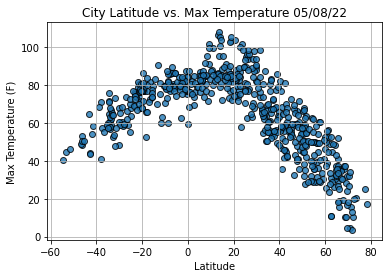

In [18]:
# Extract relevant fields fromt the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import time module
import time

# Build the scatter plot for latitude vs. max temp.

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


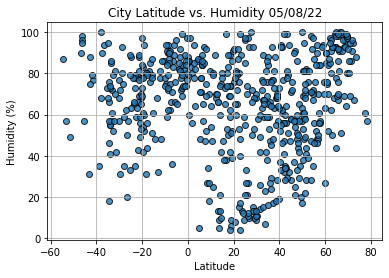

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

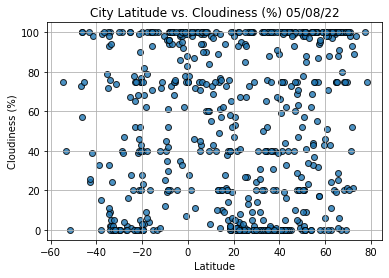

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

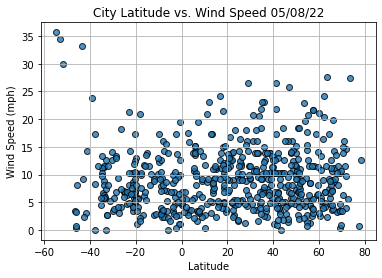

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

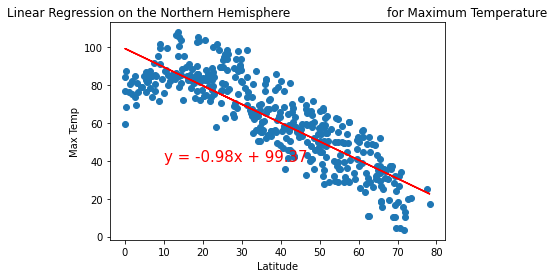

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

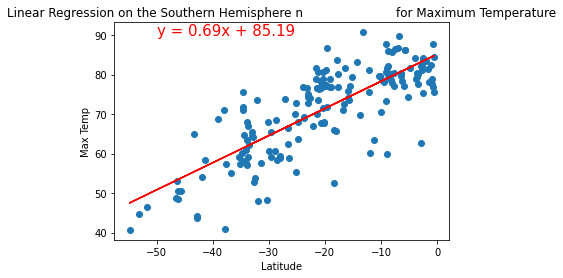

In [42]:
# Linear regression on the Northern Hemisphere (max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

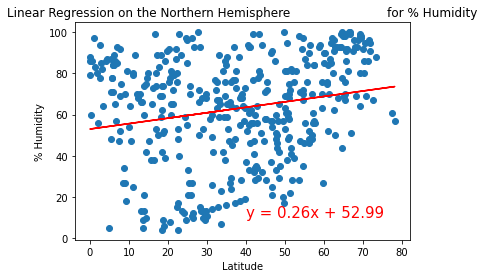

In [38]:
# Linear regression on the Northern Hemisphere (humididty)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \
                        for % Humidity", "% Humidity", (40,10))

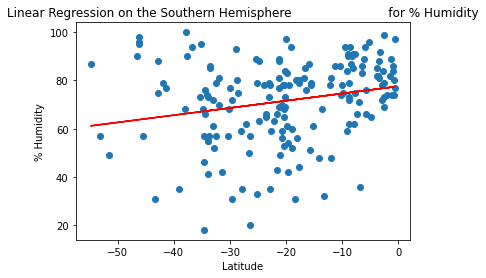

In [39]:
# Linear regression on the Southern Hemisphere (humididty)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \
                        for % Humidity", "% Humidity", (-50,10))

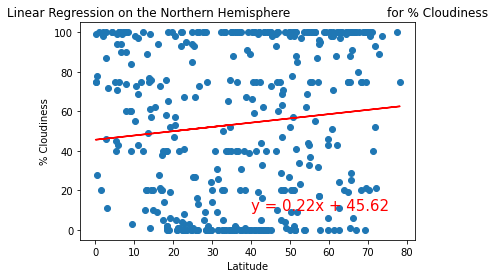

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

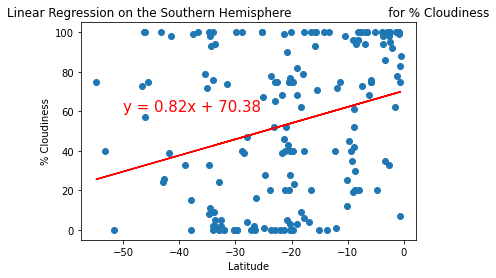

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

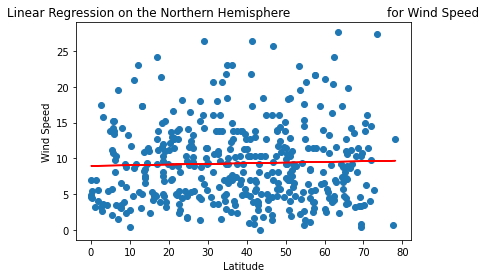

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

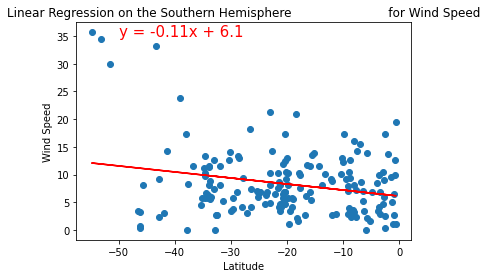

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))